## Objetivo da Análise Exploratória

O objetivo deste notebook é realizar uma análise exploratória detalhada do conjunto de dados "TABELA_BIG_DATA_FT_OCORRENCIAS". Através dessa análise, o grupo Xpress busca entender melhor as características e padrões dos dados, identificar possíveis inconsistências ou dados ausentes e obter insights que possam direcionar futuras análises ou modelagens preditivas. A análise se concentrará em aspectos como a distribuição dos dados, a relação entre variáveis e a identificação de tendências relevantes.

## Introdução

A análise exploratória de dados (AED) é uma etapa crucial no processo de análise de dados, pois permite que analistas compreendam a estrutura e a natureza do conjunto de dados em questão. Neste caso, o grupo Xpress está lidando com um conjunto de dados que contém informações sobre ocorrências que, ao que parece, estão relacionadas a eventos de energia ou infraestrutura.

O conjunto de dados contém diversas colunas que fornecem informações sobre a classificação das ocorrências, descrições detalhadas, datas e horários, assim como variáveis associadas a cada evento. A manipulação e visualização dessas informações permitirá ao grupo não apenas detectar padrões, mas também levantar hipóteses que podem ser testadas em análises subsequentes.

Nesta análise, o grupo Xpress abordará os seguintes aspectos principais:
1. **Carregamento e pré-processamento dos dados**: Importação do conjunto de dados e tratamento de dados ausentes ou inconsistentes.
2. **Análise descritiva**: Estatísticas básicas e visualizações que ajudarão a entender a distribuição e as características dos dados.
3. **Identificação de padrões**: Exploração das relações entre diferentes variáveis e identificação de possíveis tendências ou agrupamentos relevantes.

Com isso, espera-se conseguir um entendimento mais profundo dos dados, que poderá servir de base para análises mais complexas e para a tomada de decisões informadas.

## Carregamento de dados e importação de bibliotecas

In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from io import StringIO

In [2]:
df = pd.read_csv("TABELA_BIG_DATA_FT_OCORRENCIAS.csv", encoding="utf-16le")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_25588\3078800592.py:1: DtypeWarning: Columns (0,3,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TABELA_BIG_DATA_FT_OCORRENCIAS.csv", encoding="utf-16le")


## Análise Exploratória Inicial

### Primeiras linhas do dataset

In [3]:
# Exibindo as primeiras linhas do dataset
df.head()

,Class Manchete,Classificacao Manchete,Data Atualizacao,Data Normalizacao,Desc Ocorrencia,Eventos Relacionados,Fl Estimados,Flag Controle,Hora Ocorrencia,Id Datanormalizacao,...,Id Tipo Relevancia,Manchete,Nr Acoes,Pass Estimados,Sic Id Ocorrencia,Sic Id Ocorrencia 3,Total Ajustes,Trecho,Tx Tipo Relevancia,Tx Trem
0,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,26/05/2010 05:30:00,DEVIDO QUEDA DE ENERGIA NA ESTAÇÃO ARACARÉ ENT...,NaN,0,NÃO,"0,145833",20100528.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,23112,2,0,ARC,NaN,NaN
1,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,29/05/2010 16:30:00,DEVIDO A AVARIA DE BLOQUEIOS TOTAL DAS 15:10 H...,NaN,0,NÃO,"0,631944",20100614.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,23629,2,0,CVN,NaN,NaN
2,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,13/07/2010 23:55:00,DEVIDO A AVARIA DE BLOQUEIOS TOTAL DAS 11:30 H...,NaN,0,NÃO,"0,479167",20100729.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,30461,2,0,ARC,NaN,NaN
3,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,20/07/2010 19:30:00,CONFORME INFORMADO PELO SR. ENCARREGADO DE EST...,NaN,0,NÃO,"0,811806",20100805.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,31628,3,0,ILE,NaN,NaN
4,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,30/08/2010 04:58:00,DEVIDO FALTA DE ENERGIA DA CONCESSIONÁRIA AES...,NaN,0,NÃO,"0,206944",20100915.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,38474,2,0,EGO,NaN,NaN


### Informações básicas

In [4]:
# Visualizando as informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715111 entries, 0 to 715110
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Class Manchete          598051 non-null  object 
 1   Classificacao Manchete  715111 non-null  object 
 2   Data Atualizacao        0 non-null       float64
 3   Data Normalizacao       241109 non-null  object 
 4   Desc Ocorrencia         714982 non-null  object 
 5   Eventos Relacionados    0 non-null       float64
 6   Fl Estimados            715111 non-null  int64  
 7   Flag Controle           715111 non-null  object 
 8   Hora Ocorrencia         715111 non-null  object 
 9   Id Datanormalizacao     596637 non-null  float64
 10  Id Dataocorrencia       715111 non-null  int64  
 11  Id Localidade           715111 non-null  int64  
 12  Id Sic Classificacao    715111 non-null  int64  
 13  Id Tipo Relevancia      316350 non-null  float64
 14  Manchete            

### Descrição estatística

In [5]:
# Exibindo a descrição estatística
df.describe()

,Data Atualizacao,Eventos Relacionados,Fl Estimados,Id Datanormalizacao,Id Dataocorrencia,Id Localidade,Id Sic Classificacao,Id Tipo Relevancia,Nr Acoes,Pass Estimados,Sic Id Ocorrencia,Sic Id Ocorrencia 3,Total Ajustes,Tx Trem
count,0.0,0.0,715111.000000,5.966370e+05,7.151110e+05,715111.000000,715111.000000,316350.000000,316420.000000,715111.000000,715111.000000,715111.000000,715111.0,0.0
mean,NaN,NaN,0.000313,2.010884e+07,2.012084e+07,248.608044,4.282331,-0.999940,0.000066,0.394490,24865.187336,1.981701,0.0,NaN
std,NaN,NaN,0.017696,5.015635e+04,5.491824e+04,163.171818,1.227361,0.017511,0.008146,54.165603,20295.795615,0.765072,0.0,NaN
min,NaN,NaN,0.000000,2.000012e+07,2.000041e+07,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.0,NaN
25%,NaN,NaN,0.000000,2.007080e+07,2.008080e+07,108.000000,3.000000,-1.000000,0.000000,0.000000,6891.000000,1.000000,0.0,NaN
50%,NaN,NaN,0.000000,2.011072e+07,2.012122e+07,224.000000,5.000000,-1.000000,0.000000,0.000000,18797.000000,2.000000,0.0,NaN
75%,NaN,NaN,0.000000,2.015111e+07,2.017013e+07,390.000000,5.000000,-1.000000,0.000000,0.000000,41932.000000,3.000000,0.0,NaN
max,NaN,NaN,1.000000,2.023111e+07,2.023121e+07,815.000000,9.000000,5.000000,1.000000,25695.000000,75109.000000,3.000000,0.0,NaN


### Contagem de valores nulos

In [6]:
# Checando valores nulos
df.isnull().sum()

Class Manchete            117060
Classificacao Manchete         0
Data Atualizacao          715111
Data Normalizacao         474002
Desc Ocorrencia              129
Eventos Relacionados      715111
Fl Estimados                   0
Flag Controle                  0
Hora Ocorrencia                0
Id Datanormalizacao       118474
Id Dataocorrencia              0
Id Localidade                  0
Id Sic Classificacao           0
Id Tipo Relevancia        398761
Manchete                       0
Nr Acoes                  398691
Pass Estimados                 0
Sic Id Ocorrencia              0
Sic Id Ocorrencia 3            0
Total Ajustes                  0
Trecho                         0
Tx Tipo Relevancia        715107
Tx Trem                   715111
dtype: int64

## Limpeza de Dados

In [7]:
# Removendo duplicados
df = df.drop_duplicates()

# Substituindo valores nulos em colunas categóricas por "N/A"
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('N/A')

# Substituindo valores nulos em colunas numéricas por -1
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(-1)

# Removendo linhas que contêm a palavra "SUICIDIO" na coluna 'Desc Ocorrencia'
df = df[~df['Desc Ocorrencia'].str.contains('SUICIDIO', case=False, na=False)]

# Confirmando se duplicatas e nulos foram tratados
print(f'Duplicados: {df.duplicated().sum()}')
print(f'Nulos restantes:\n{df.isnull().sum()}')


Duplicados: 0
Nulos restantes:
Class Manchete            0
Classificacao Manchete    0
Data Atualizacao          0
Data Normalizacao         0
Desc Ocorrencia           0
Eventos Relacionados      0
Fl Estimados              0
Flag Controle             0
Hora Ocorrencia           0
Id Datanormalizacao       0
Id Dataocorrencia         0
Id Localidade             0
Id Sic Classificacao      0
Id Tipo Relevancia        0
Manchete                  0
Nr Acoes                  0
Pass Estimados            0
Sic Id Ocorrencia         0
Sic Id Ocorrencia 3       0
Total Ajustes             0
Trecho                    0
Tx Tipo Relevancia        0
Tx Trem                   0
dtype: int64


## Análise Exploratória com Gráficos

### Gráfico de barras relacionado à quantidade de diferentes "Classificacao Manchete"

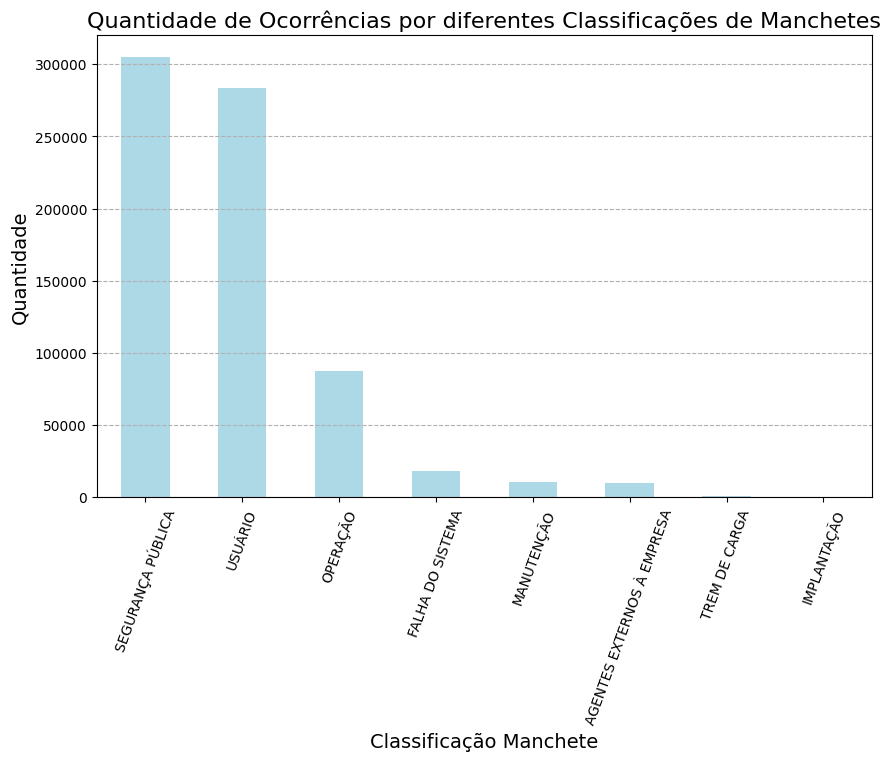

In [8]:
import matplotlib.pyplot as plt

# Gráfico de barras para quantidade de diferentes "Class Manchete"
plt.figure(figsize=(10, 6))
df['Classificacao Manchete'].value_counts().plot(kind='bar', color='lightblue')  # Definindo a cor azul
plt.title('Quantidade de Ocorrências por diferentes Classificações de Manchetes', fontsize=16)
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Classificação Manchete', fontsize=14)
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--')  # Opcional: grade nas barras
plt.show()

### Gráfico de barras com "Hora Ocorrencia"

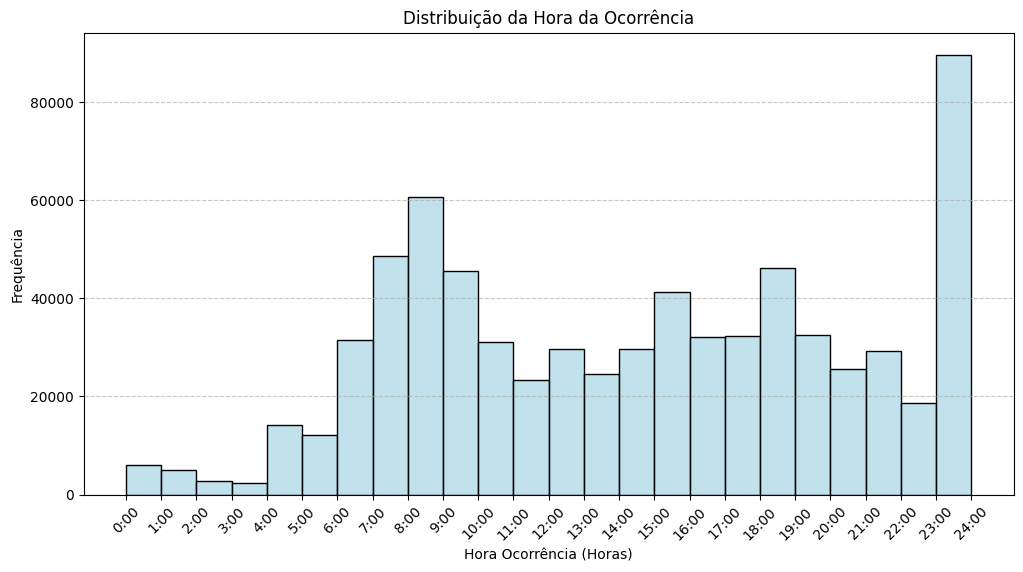

In [9]:
# Convertendo 'Hora Ocorrencia' para tipo numérico, substituindo vírgulas por pontos
df['Hora Ocorrencia'] = df['Hora Ocorrencia'].astype(str).str.replace(',', '.', regex=False)

# Convertendo para float e lidando com erros
df['Hora Ocorrencia'] = pd.to_numeric(df['Hora Ocorrencia'], errors='coerce')

# Assumindo que 'Hora Ocorrencia' representa frações de um dia (ex: 0.1 = 2.4 horas)
df['Hora Ocorrencia Horas'] = (df['Hora Ocorrencia'] * 24).round().astype(int)

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.histplot(df['Hora Ocorrencia Horas'], bins=24, color='lightblue', kde=False)

# Formatando o eixo X para mostrar horas
plt.xticks(ticks=range(0, 25), labels=[f'{int(x)}:00' for x in range(0, 25)], rotation=45)
plt.title('Distribuição da Hora da Ocorrência')
plt.ylabel('Frequência')
plt.xlabel('Hora Ocorrência (Horas)')

# Adicionando uma grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Gráfico de barras com "Id Localidade"

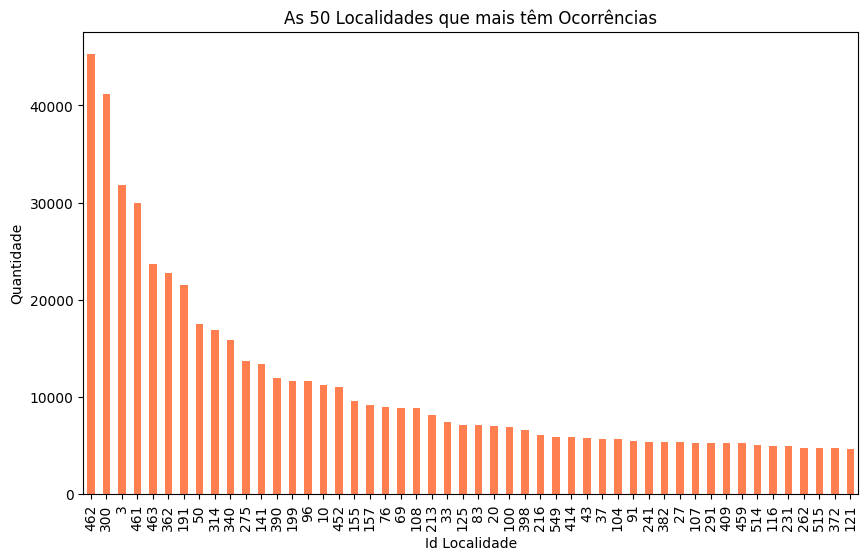

In [10]:
# Selecionando os 50 valores mais frequentes de 'Id Localidade'
top_50_localidades = df['Id Localidade'].value_counts().nlargest(50)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
top_50_localidades.plot(kind='bar', color='coral')
plt.title('As 50 Localidades que mais têm Ocorrências')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

### Gráfico de barras com "Trecho"

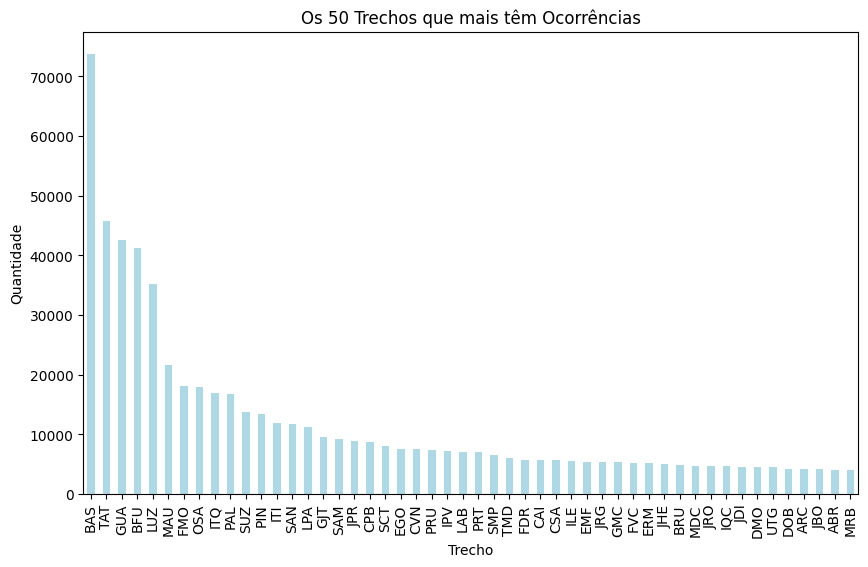

In [11]:
# Selecionando os 50 valores mais frequentes de 'Trecho'
top_50_trechos = df['Trecho'].value_counts().nlargest(50)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
top_50_trechos.plot(kind='bar', color='lightblue')
plt.title('Os 50 Trechos que mais têm Ocorrências')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

## Detecção de Outliers

### Outliers (calculados por código) da Hora da Ocorrência

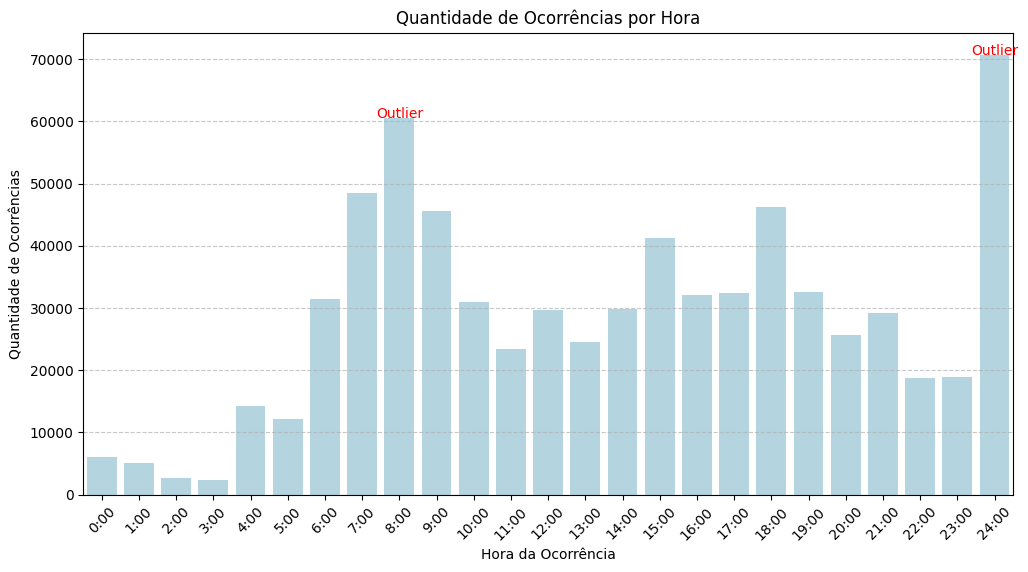

Outliers detectados:
   Hora  Quantidade  Outlier
0    24       70720     True
1     8       60604     True


In [12]:
# Convertendo 'Hora Ocorrencia' para tipo numérico
df['Hora Ocorrencia'] = df['Hora Ocorrencia'].astype(str).str.replace(',', '.', regex=False)

# Convertendo para float e lidando com erros
df['Hora Ocorrencia'] = pd.to_numeric(df['Hora Ocorrencia'], errors='coerce')

# Assumindo que 'Hora Ocorrencia' representa frações de um dia (ex: 0.1 = 2.4 horas)
df['Hora Ocorrencia Horas'] = (df['Hora Ocorrencia'] * 24).round().astype(int)

# Agrupando por 'Hora Ocorrencia' e contando ocorrências
occurrences_per_hour = df['Hora Ocorrencia Horas'].value_counts().reset_index()
occurrences_per_hour.columns = ['Hora', 'Quantidade']

# Cálculo do IQR para detectar outliers
Q1 = occurrences_per_hour['Quantidade'].quantile(0.25)
Q3 = occurrences_per_hour['Quantidade'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando outliers
occurrences_per_hour['Outlier'] = (occurrences_per_hour['Quantidade'] < lower_bound) | (occurrences_per_hour['Quantidade'] > upper_bound)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=occurrences_per_hour['Hora'], y=occurrences_per_hour['Quantidade'], color='lightblue')

# Adicionando informações de outliers
for index, row in occurrences_per_hour.iterrows():
    if row['Outlier']:
        plt.text(row['Hora'], row['Quantidade'] + 0.5, 'Outlier', color='red', ha='center')

# Configurando título e rótulos
plt.title('Quantidade de Ocorrências por Hora')
plt.xlabel('Hora da Ocorrência')
plt.ylabel('Quantidade de Ocorrências')

# Exibir o gráfico
plt.xticks(ticks=range(0, 25), labels=[f'{int(x)}:00' for x in range(0, 25)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Exibir outliers
outliers = occurrences_per_hour[occurrences_per_hour['Outlier']]
print("Outliers detectados:")
print(outliers)

## Análise Bivariada

### Análise entre "Trecho" e "Classificacao Manchete"

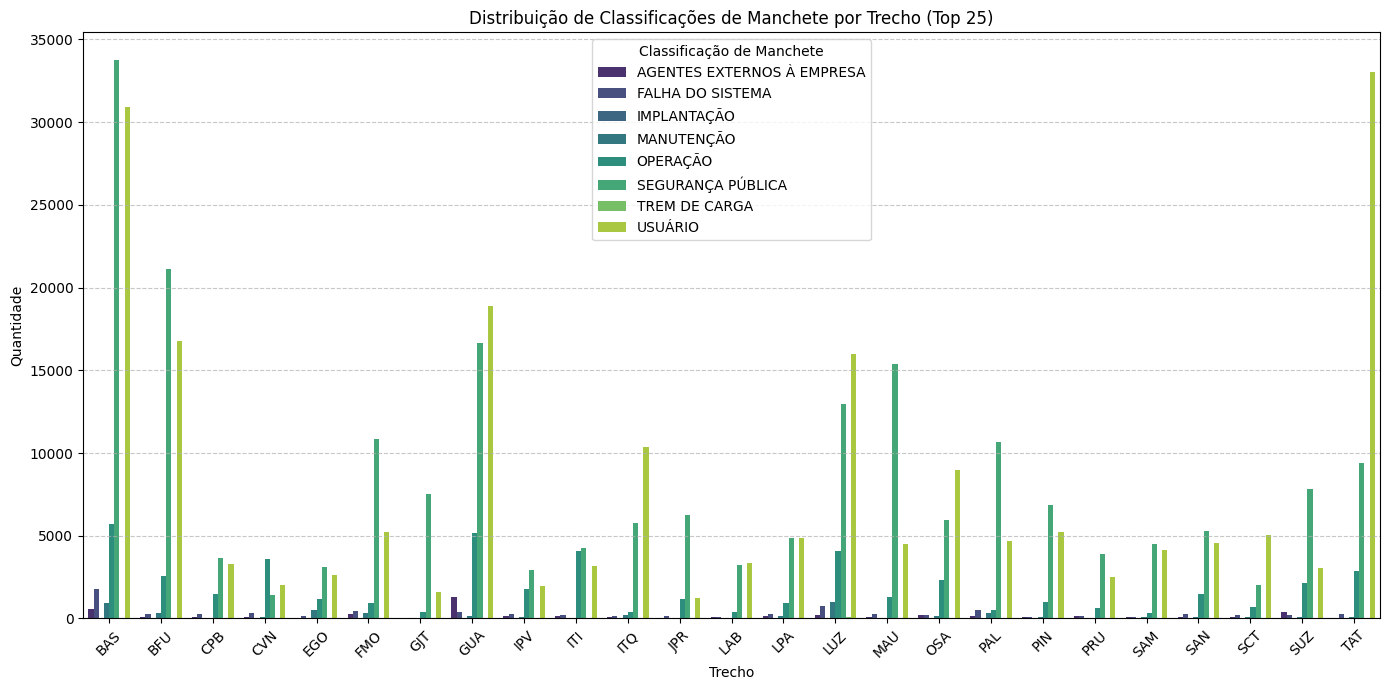

In [13]:
# Contar a frequência de cada combinação de Trecho e Classificação de Manchete
contingency = df.groupby(['Trecho', 'Classificacao Manchete']).size().reset_index(name='Quantidade')

# Selecionar os 50 primeiros trechos com base na quantidade
top_trechos = contingency.groupby('Trecho')['Quantidade'].sum().nlargest(25).index
filtered_data = contingency[contingency['Trecho'].isin(top_trechos)]

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(14, 7))
sns.barplot(x='Trecho', y='Quantidade', hue='Classificacao Manchete', data=filtered_data, palette='viridis')
plt.title('Distribuição de Classificações de Manchete por Trecho (Top 25)')
plt.xlabel('Trecho')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Classificação de Manchete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Análise Multivariada

### Correlação entre variáveis numéricas

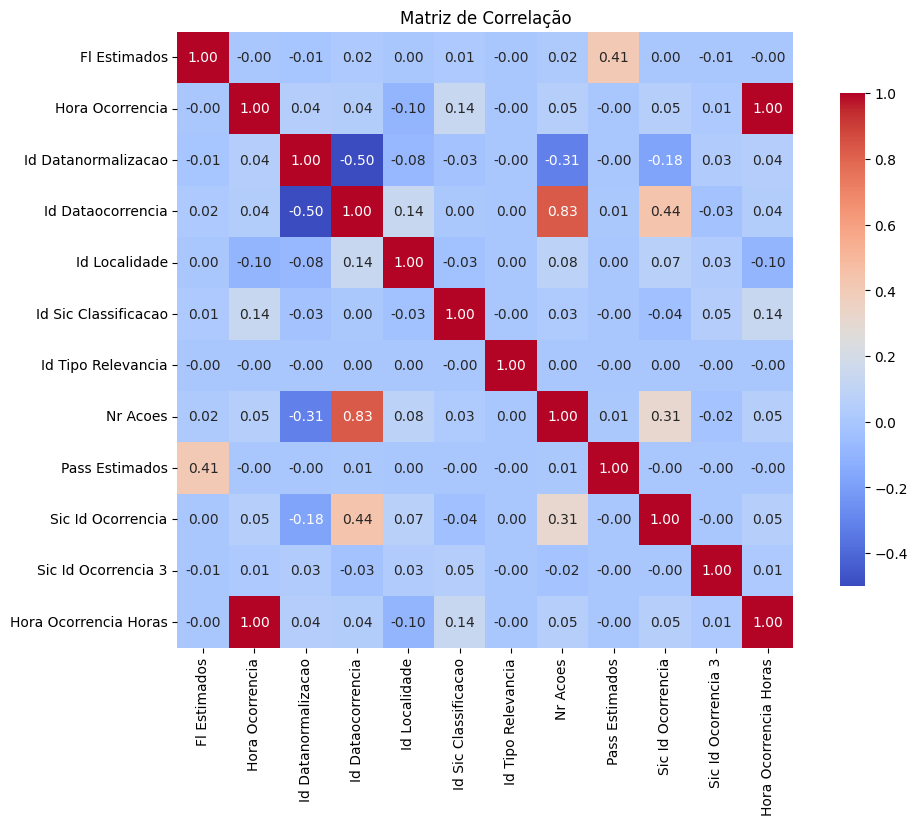

In [14]:
# Selecionar colunas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Remover as colunas indesejadas, pois estão com problemas de formatação para apresentar na matriz
numerical_cols = numerical_cols.drop(columns=['Total Ajustes', 'Tx Trem', "Data Atualizacao", "Eventos Relacionados"], errors='ignore')

# Calcular a matriz de correlação
correlation_matrix = numerical_cols.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar um mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configurar título
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()

## Transformando para Parquet e subindo para bucket no S3

In [15]:
# Salvar o DataFrame como arquivo Parquet localmente
df.to_parquet('TABELA_BIG_DATA_FT_OCORRENCIAS.parquet', engine='pyarrow')

In [ ]:
# Configurações do S3
s3_bucket = 'cptm-xpress'
s3_key = 'ocorrencias-e-falhas/TABELA_BIG_DATA_FT_OCORRENCIAS.parquet'

# Conexão com o S3 usando boto3
session = boto3.Session(
    aws_access_key_id='',
    aws_secret_access_key='',
    region_name='us-east-1' 
)
s3 = session.resource('s3')

# Upload do arquivo para o S3
s3.Bucket(s3_bucket).upload_file('TABELA_BIG_DATA_FT_OCORRENCIAS.parquet', s3_key)

print("Arquivo Parquet salvo e enviado para o S3 com sucesso!")

## Hipóteses e Conclusões

Com base nas análises exploratórias realizadas sobre a base de dados, foram levantadas as seguintes hipóteses:

1. **A categoria "Segurança Pública" possui a maior quantidade de ocorrências:**  
   A análise mostra que a categoria "Segurança Pública" representa o maior número de incidentes registrados, sugerindo que falhas de segurança são um problema crítico e recorrente no sistema. Isso pode indicar uma necessidade de revisão nas políticas e práticas de segurança ou um monitoramento mais constante e reforçado para reduzir esses incidentes.

2. **As categorias "Segurança Pública" e "Usuário" representam aproximadamente 80% das falhas:**  
   As duas categorias juntas são responsáveis por uma parcela significativa das ocorrências, o que implica que problemas relacionados à segurança e à interação do usuário com o sistema são as principais causas de falhas. Esse dado sugere que melhorias nas instruções e segurança oferecidas aos usuários podem reduzir a incidência de problemas nesses aspectos.

3. **As ocorrências se concentram nos horários de pico (7:00-9:00 e 18:00-20:00):**  
   Observou-se um aumento na quantidade de ocorrências durante os horários de maior fluxo de pessoas, especialmente no início da manhã e no final da tarde. Essa distribuição indica que o sistema fica sobrecarregado nesses períodos, possivelmente devido à alta demanda. Estratégias como escalonamento de horários, aumento de capacidade ou otimização da gestão dos fluxos de usuários nesses horários poderiam minimizar essas falhas.

4. **As ocorrências não descritas ao longo do dia tendem a ser relatadas às 23:00:**  
   Existe um padrão de concentração de registros de ocorrências às 23:00, sugerindo que incidentes não documentados durante o dia podem estar sendo acumulados e relatados no fim da jornada. Esse padrão pode refletir um procedimento de encerramento dos relatórios diários ou uma redução no controle e supervisão contínua ao longo do dia, o que poderia ser melhorado com o uso de relatórios mais frequentes e em tempo real.

5. **Os trechos que mais têm ocorrências são pontos de baldeação:**  
   Os trechos com maior número de ocorrências possuem baldeações, indicando que áreas de conexão entre diferentes rotas representam pontos críticos para o sistema. A hipótese é que esses locais são mais propensos a falhas devido ao aumento de volume de usuários que realizam transferências, o que aumenta a complexidade operacional. Focar em melhorias na estrutura e no flux
